In [3]:
rm(list=ls())
library(limma)
library(sva)
library(ggplot2)

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-25. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Loading required package: BiocParallel


In [4]:
data=data.frame(read.table('atac.counts.prededup.txt',header=TRUE,sep='\t'))
chrom=data$Chrom
start_pos=data$Start
end_pos=data$End
unique_names=paste(chrom,start_pos,end_pos,sep="_")
data$Chrom=NULL
data$Start=NULL
data$End=NULL
rownames(data)=unique_names


In [5]:
batches=data.frame(read.table('../atacseq_batches_truerep.txt',header=TRUE,sep='\t'))
mod1=model.matrix(~0+Treatment+CellCycle,data=batches)
mod0=model.matrix(~1,data=batches)
v=voom(counts=data,design=mod1)

In [13]:
batches


,Replicate,Sample,CellCycle,Treatment,PC1,PC2,PC3,PC4,PC5,PC6,⋯,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
earlyG1_controls_Rep1,earlyG1_controls_Rep1,earlyG1_controls,earlyG1,controls,-318.29645,21.657513,44.931294,18.9991795,-101.233905,108.659065,⋯,44.931294,18.9991795,-101.233905,108.659065,-41.77971803,-31.597068,15.172026,-2.819843,22.869039,-1.560666e-12
earlyG1_controls_Rep2,earlyG1_controls_Rep2,earlyG1_controls,earlyG1,controls,-325.12167,1.258123,7.093861,-30.4374890,110.904698,-118.593609,⋯,7.093861,-30.4374890,110.904698,-118.593609,16.21906950,26.541593,-3.293089,-2.949095,25.496163,-5.572630e-12
earlyG1_DMSO_Rep1,earlyG1_DMSO_Rep1,earlyG1_DMSO,earlyG1,DMSO,-101.74139,181.357479,-21.062357,142.0573106,75.618020,-6.329084,⋯,-21.062357,142.0573106,75.618020,-6.329084,-8.53264225,-32.052125,-16.244847,-5.662978,-24.179151,-9.262141e-13
earlyG1_DMSO_Rep2,earlyG1_DMSO_Rep2,earlyG1_DMSO,earlyG1,DMSO,-113.49412,181.956651,-49.475755,-117.7978319,-94.808856,-4.002801,⋯,-49.475755,-117.7978319,-94.808856,-4.002801,34.08861546,36.299210,4.340300,10.697355,-23.468487,7.219474e-13
lateG1_controls_Rep1,lateG1_controls_Rep1,lateG1_controls,lateG1,controls,-42.14024,-147.660964,-112.955302,-47.3522634,101.835928,152.575483,⋯,-112.955302,-47.3522634,101.835928,152.575483,46.63601470,7.425730,-12.851859,5.911550,-6.720940,5.057676e-13
lateG1_controls_Rep2,lateG1_controls_Rep2,lateG1_controls,lateG1,controls,-40.03474,-186.610509,-51.818680,-0.6162967,-65.380715,-101.455822,⋯,-51.818680,-0.6162967,-65.380715,-101.455822,-57.69186545,-30.401401,-11.809108,31.900431,-11.698909,-5.627604e-13
lateG1_DMSO_Rep1,lateG1_DMSO_Rep1,lateG1_DMSO,lateG1,DMSO,178.05986,-10.503738,-123.566480,94.4084450,4.684206,-24.226222,⋯,-123.566480,94.4084450,4.684206,-24.226222,29.66546991,11.546590,52.393007,3.418570,6.059579,1.685117e-12
lateG1_DMSO_Rep2,lateG1_DMSO_Rep2,lateG1_DMSO,lateG1,DMSO,180.20661,-9.469731,-117.741857,-2.0584644,-74.684560,-22.000834,⋯,-117.741857,-2.0584644,-74.684560,-22.000834,-49.30296355,9.675585,-28.030870,-40.798078,12.648821,7.345226e-13
SG2M_controls_Rep1,SG2M_controls_Rep1,SG2M_controls,SG2M,controls,33.11433,-107.703340,135.829406,24.3146604,-52.352141,-26.603278,⋯,135.829406,24.3146604,-52.352141,-26.603278,171.65123904,-8.597129,-2.690284,-17.084377,-8.429151,1.281150e-12
SG2M_controls_Rep2,SG2M_controls_Rep2,SG2M_controls,SG2M,controls,33.98846,-90.695544,149.755760,0.7988913,36.265755,18.544027,⋯,149.755760,0.7988913,36.265755,18.544027,-129.26938829,33.705865,15.717405,-14.620241,-21.265180,1.361904e-12


In [7]:
#sva 
sva.obj=sva(v$E,mod1,mod0)


Number of significant surrogate variables is:  4 
Iteration (out of 5 ):1  2  3  4  5  

In [8]:
colnames(sva.obj$sv)=c("sva1","sva2","sva3","sva4")
mod2=cbind(mod1,sva.obj$sv)
v=voom(counts=data,design=mod2)
fit <- lmFit(v, mod2)
sv_contribs=coefficients(fit)[,c(5,6,7,8)] %*% t(fit$design[,c(5,6,7,8)])


In [9]:
data_corrected=v$E-sv_contribs


[1] 4.434284e+01 1.608477e+01 1.035638e+01 7.506205e+00 6.827554e+00
 [6] 6.488378e+00 5.978145e+00 1.032332e+00 5.409306e-01 4.608026e-01
[11] 3.816656e-01 5.355253e-28

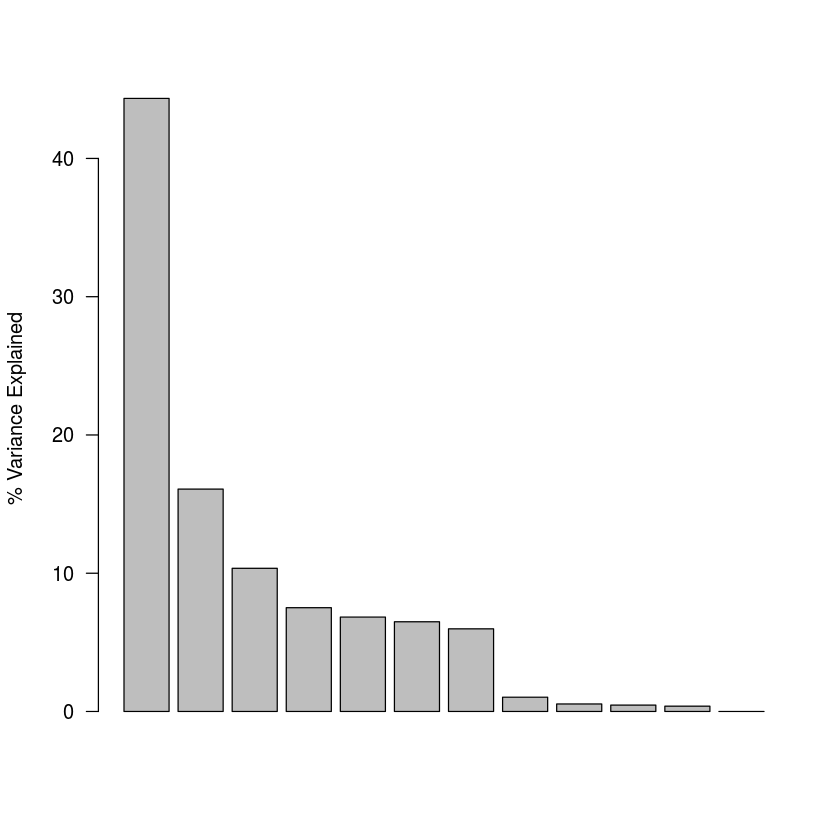

In [10]:
data.pca=prcomp(t(data_corrected))

barplot(100*data.pca$sdev^2/sum(data.pca$sdev^2),las=2,xlab="",ylab="% Variance Explained")
100*data.pca$sdev^2/sum(data.pca$sdev^2)

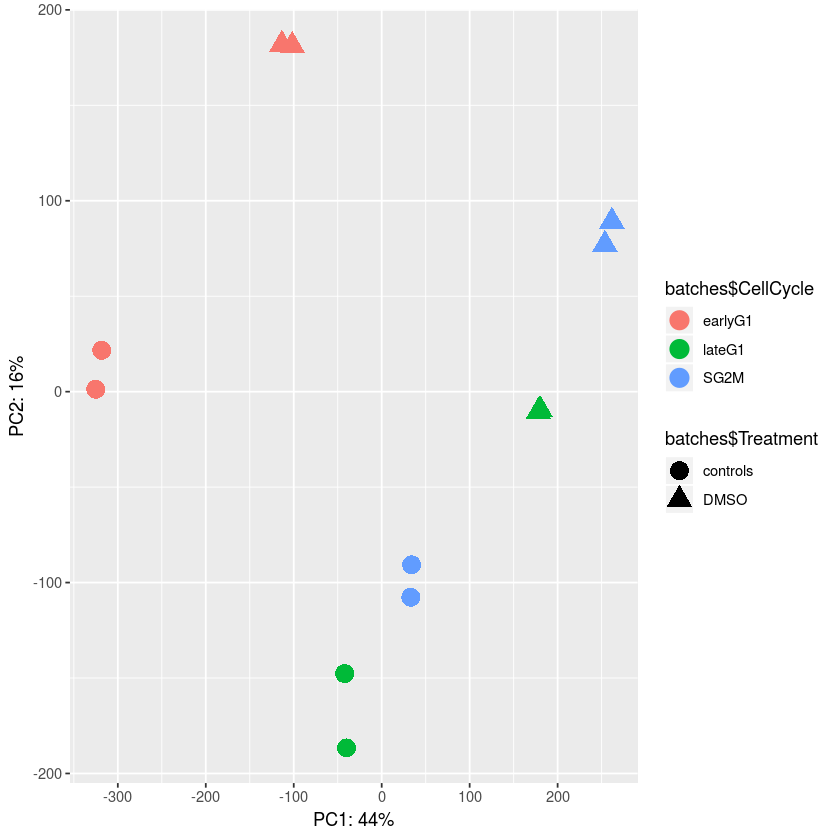

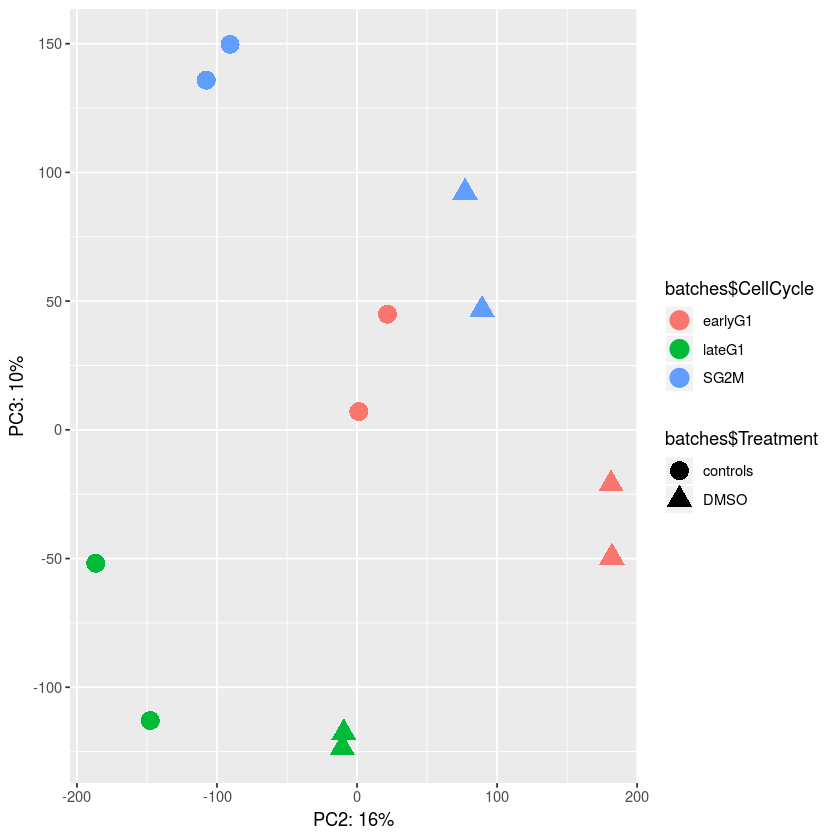

In [16]:
batches=data.frame(read.table('../atacseq_batches_truerep.txt',header=TRUE,sep='\t'))
batches=cbind(batches,data.pca$x)

print(ggplot(data=batches,
             aes(x=batches$PC1,
                 y=batches$PC2,
                 shape=batches$Treatment,
                 color=batches$CellCycle))+
    geom_point(size=5)+
    xlab("PC1: 44%")+
    ylab("PC2: 16%"))

print(ggplot(data=batches,
             aes(x=batches$PC2,
                 y=batches$PC3,
                 shape=batches$Treatment,
                 color=batches$CellCycle))+
    geom_point(size=5)+
    xlab("PC2: 16%")+
    ylab("PC3: 10%"))


In [17]:
write.csv(data_corrected,"atac_corrected.csv")


In [18]:
#We re-run the linear fit on the corrected data 
mod3=model.matrix(~0+Sample,data=batches)
fit2 <- lmFit(data_corrected, mod3)

In [19]:
mod3

,SampleearlyG1_controls,SampleearlyG1_DMSO,SamplelateG1_controls,SamplelateG1_DMSO,SampleSG2M_controls,SampleSG2M_DMSO
earlyG1_controls_Rep1,1,0,0,0,0,0
earlyG1_controls_Rep2,1,0,0,0,0,0
earlyG1_DMSO_Rep1,0,1,0,0,0,0
earlyG1_DMSO_Rep2,0,1,0,0,0,0
lateG1_controls_Rep1,0,0,1,0,0,0
lateG1_controls_Rep2,0,0,1,0,0,0
lateG1_DMSO_Rep1,0,0,0,1,0,0
lateG1_DMSO_Rep2,0,0,0,1,0,0
SG2M_controls_Rep1,0,0,0,0,1,0
SG2M_controls_Rep2,0,0,0,0,1,0


In [20]:

#specify the contrasts 
cont.matrix=makeContrasts(earlyg1_dmso_control="SampleearlyG1_DMSO-SampleearlyG1_controls",
                          lateg1_dmso_control="SamplelateG1_DMSO-SamplelateG1_controls",
                          sg2m_dmso_control="SampleSG2M_DMSO-SampleSG2M_controls",
                          levels=mod3)
fit2=contrasts.fit(fit2,cont.matrix)
e=eBayes(fit2)
comparisons=colnames(cont.matrix)
gene_names=unique_names
for(i in seq(1,3))
{
  tab<-topTable(e, number=nrow(data),coef=i,lfc=1,p.value = 0.05)
  names(tab)[1]=comparisons[i]
  tab$Chrom_Start_End=rownames(tab)
  write.table(tab,file=paste("atac_differential_",comparisons[i],".tsv",sep=""),quote=FALSE,sep='\t',row.names = FALSE)
}

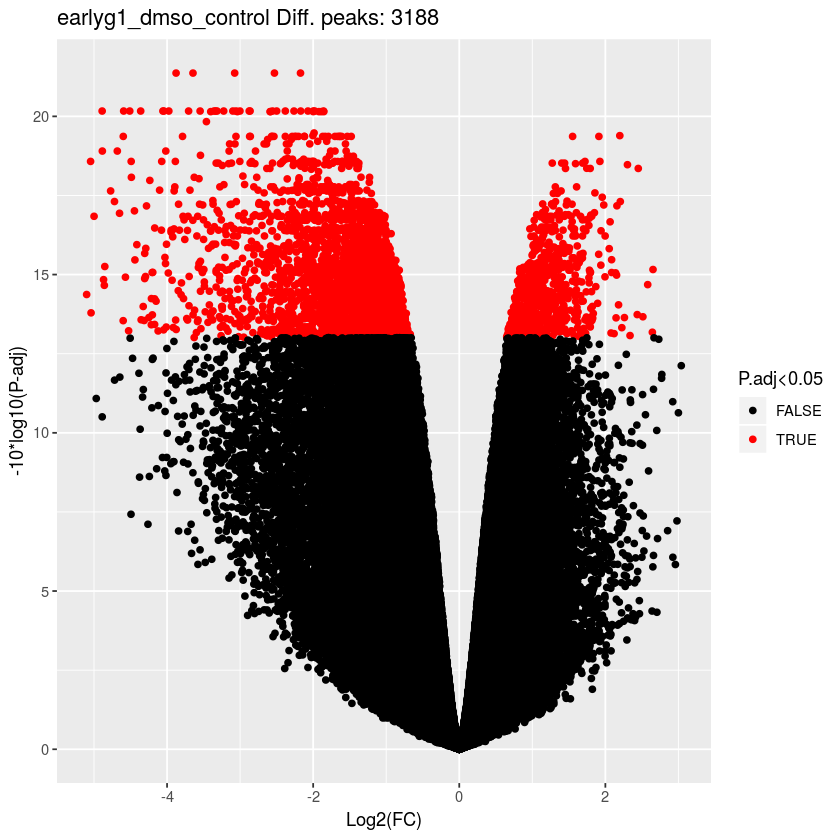

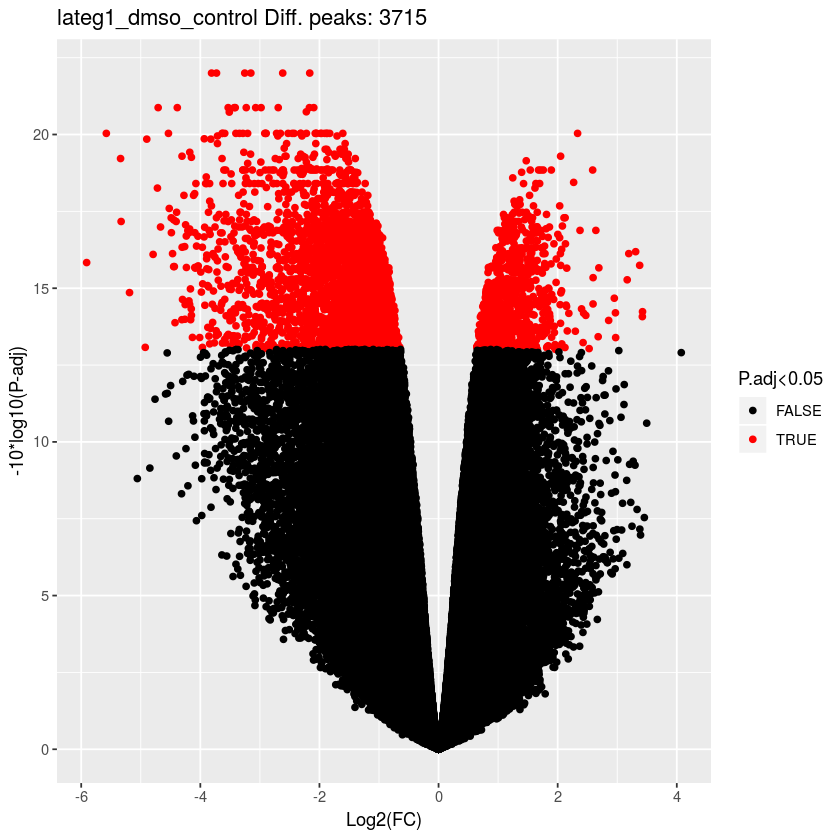

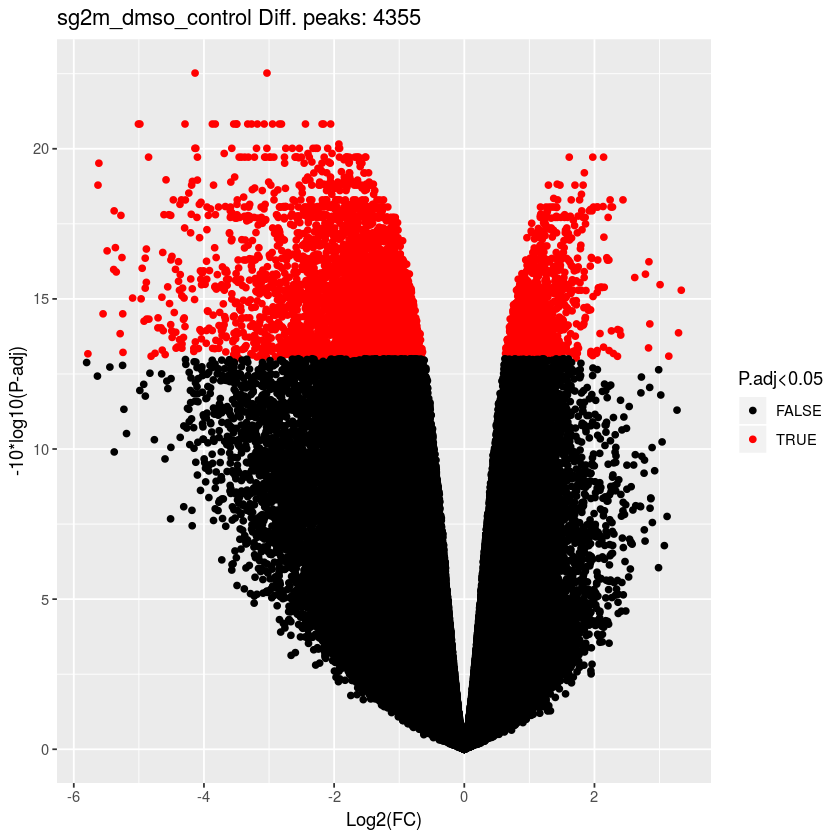

In [21]:
for(i in seq(1,length(comparisons)))
{
 res=as.data.frame(topTable(e, number=nrow(e),coef=i))
 res$logPadj=-10*log10(res$adj.P.Val)
 numsig=sum((abs(res$logFC)>1) & (res$adj.P.Val <= 0.05))
 sigsubset=res[res$adj.P.Val<=0.05,]
 outlabel=paste(comparisons[i],"Diff. peaks:",numsig)
 res$color=res$adj.P.Val<=0.05

 #png(outpng)#,width=5,height=5,pointsize=12)
 print(ggplot(data=res,
        aes(x=res$logFC,
            y=res$logPadj,
            color=res$color))+
        geom_point()+
        xlab("Log2(FC)")+
        ylab("-10*log10(P-adj)")+
        ggtitle(outlabel)+
        scale_color_manual(values=c("#000000","#ff0000"),name="P.adj<0.05"))
}


In [22]:
system("ls",intern=TRUE)

[1] "atac_corrected.csv"                        
[2] "atac.counts.prededup.txt"                  
[3] "atac_differential_earlyg1_dmso_control.tsv"
[4] "atac_differential_lateg1_dmso_control.tsv" 
[5] "atac_differential_sg2m_dmso_control.tsv"   
[6] "Pre-dedup peaks limma with SVA.ipynb"

In [23]:
system("cat atac_differential_earlyg1_dmso_control.tsv atac_differential_lateg1_dmso_control.tsv atac_differential_sg2m_dmso_control.tsv | cut -f7 | sort | uniq | sed --expression 's/\\_/\\t/g' | grep -v Chrom | bedtools sort -i stdin > all.diffpeaks.bed",intern=TRUE)

character(0)

In [24]:
system("bedtools closest -d -a all.diffpeaks.bed -b /srv/scratch/annashch/dmso/peak_to_gene_dist/diff_genes.bed | sort |uniq > peaks.closest.bed",intern=TRUE)

character(0)

In [25]:
data=read.table("peaks.closest.bed",header=FALSE,sep='\t')
head(data)


V1,V2,V3,V4,V5,V6,V7,V8
chr10,100032452,100033029,chr10,100175955,100177323,HPS1,142927
chr10,100032452,100033029,chr10,100175955,100177483,HPS1,142927
chr10,100032452,100033029,chr10,100175955,100206667,HPS1,142927
chr10,100032452,100033029,chr10,100175955,100206683,HPS1,142927
chr10,100032452,100033029,chr10,100175955,100206684,HPS1,142927
chr10,100315012,100315254,chr10,100175955,100206684,HPS1,108329


In [26]:
data$V8[data$V8 < 1]=1
data$V8[data$V8< -1]=1000000

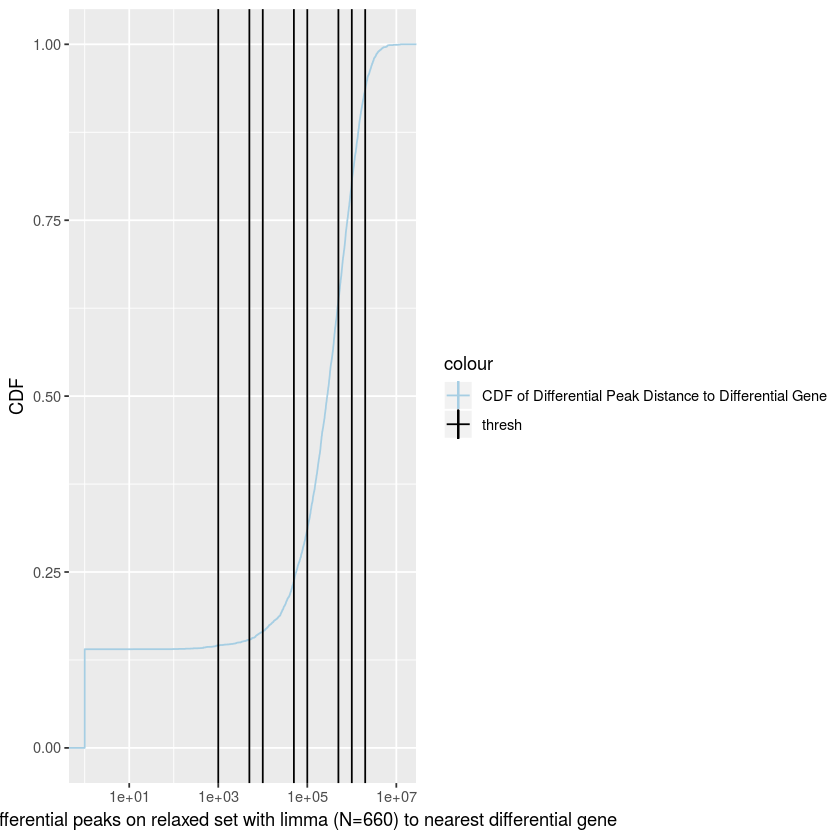

In [27]:
p1=ggplot()+
  stat_ecdf(data=data,aes(x=data$V8 ,color="CDF of Differential Peak Distance to Differential Gene"))+
  geom_vline(aes(xintercept=1000,color="thresh"))+
  geom_vline(aes(xintercept=5000,color="thresh"))+
  geom_vline(aes(xintercept=10000,color="thresh"))+
  geom_vline(aes(xintercept=50000,color="thresh"))+
  geom_vline(aes(xintercept=100000,color="thresh"))+
  geom_vline(aes(xintercept=500000,color="thresh"))+
  geom_vline(aes(xintercept=1000000,color="thresh"))+
  geom_vline(aes(xintercept=2000000,color="thresh"))+
  scale_x_continuous(trans='log10') +
  xlab("Distance from differential peaks on relaxed set with limma (N=660) to nearest differential gene")+
  ylab("CDF")+
scale_color_manual(values=c('#a6cee3','#000000'))

p1